**Ссылка на датасет:**
https://drive.google.com/drive/folders/1G5bKNEGk_HQ7CaiI5-HKqNCNqQKQQjQb?usp=sharing

Необходимые импорты

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from tqdm import tqdm

from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


Указание пути датасета и классов

In [5]:
DATADIR = "drive/MyDrive/Career and Education/SPMU/Scientific work/ВКР бакалавра/Dataset"
CATEGORIES = ["No_fire", "Fire"]

Определение тренировочных данных

In [7]:
training_data = []
IMG_SIZE = 64

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])

create_training_data()
print('\n', len(training_data))

100%|██████████| 240/240 [00:03<00:00, 67.38it/s] 


 480


Перемешивание коллекции

In [8]:
random.shuffle(training_data)

Определение входных и выходных данных

In [9]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

Нормализация (стандартизация)

In [10]:
X = X / 255.0

Создание и обучение модели

In [131]:
model = Sequential()

model.add(Conv2D(8, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))

model.add(Conv2D(8, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(X, y, batch_size = 2, epochs = 3, validation_split = 0.25)

Epoch 1/3
180/180 [==============================] - 2s 6ms/step - loss: 0.4474 - accuracy: 0.7500 - val_loss: 0.1079 - val_accuracy: 0.9833
Epoch 2/3
180/180 [==============================] - 1s 6ms/step - loss: 0.0687 - accuracy: 0.9861 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 3/3
180/180 [==============================] - 1s 5ms/step - loss: 0.0304 - accuracy: 0.9944 - val_loss: 0.0102 - val_accuracy: 1.0000


Провека на тестовой выборке

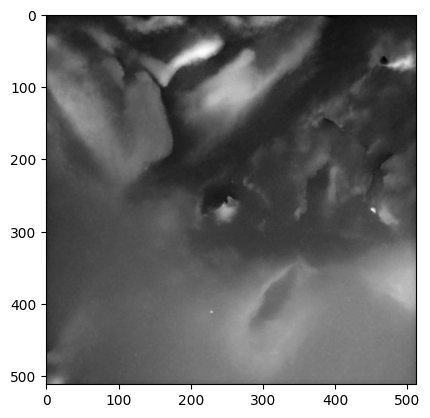

1/1 [==============================] - 0s 59ms/step
No_fire


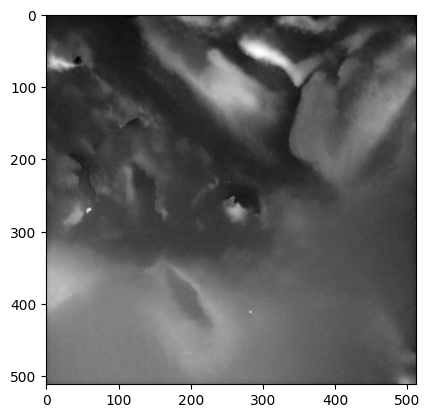

1/1 [==============================] - 0s 15ms/step
No_fire


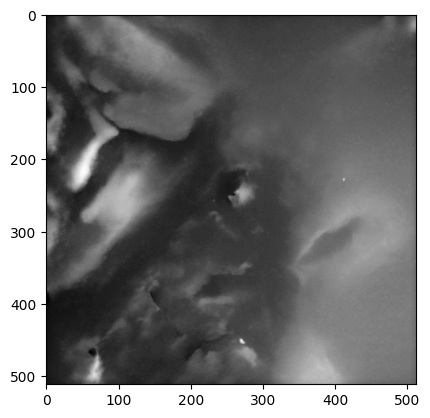

1/1 [==============================] - 0s 15ms/step
No_fire


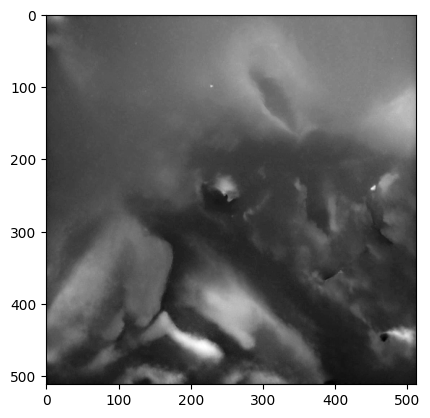

1/1 [==============================] - 0s 14ms/step
No_fire


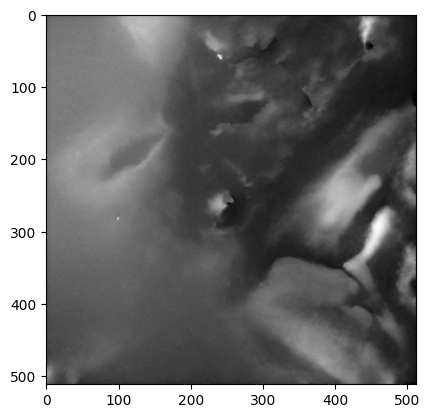

1/1 [==============================] - 0s 18ms/step
No_fire


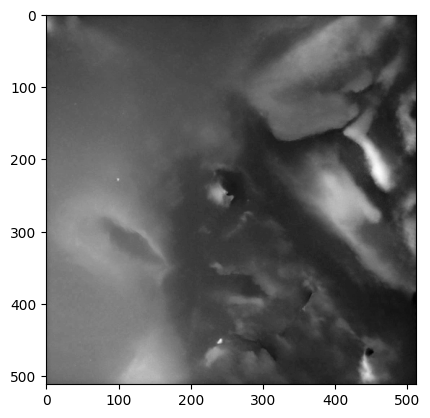

1/1 [==============================] - 0s 15ms/step
No_fire


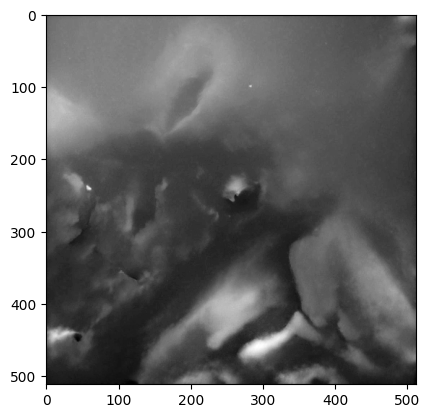

1/1 [==============================] - 0s 15ms/step
No_fire


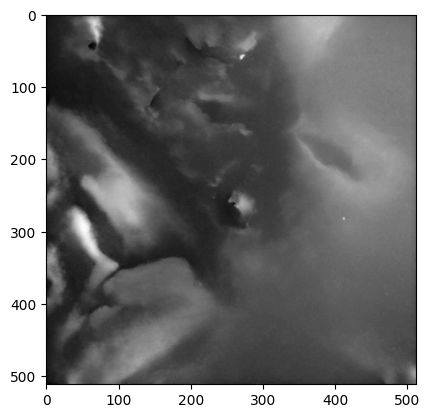

1/1 [==============================] - 0s 17ms/step
No_fire


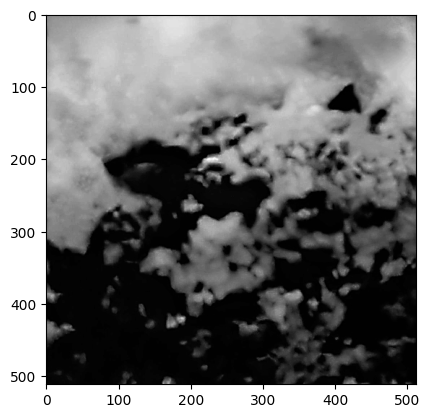

1/1 [==============================] - 0s 15ms/step
No_fire


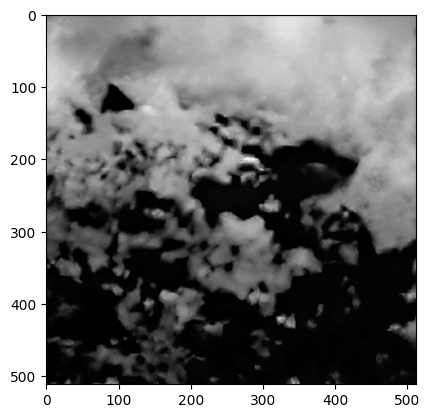

1/1 [==============================] - 0s 18ms/step
No_fire


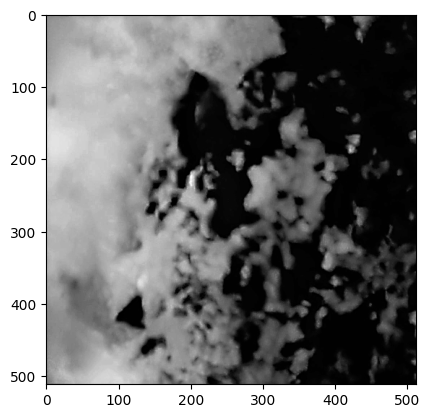

1/1 [==============================] - 0s 19ms/step
No_fire


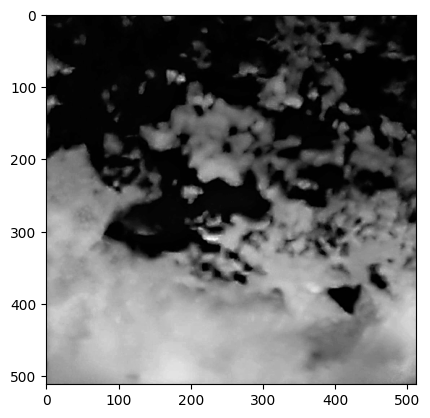

1/1 [==============================] - 0s 19ms/step
No_fire


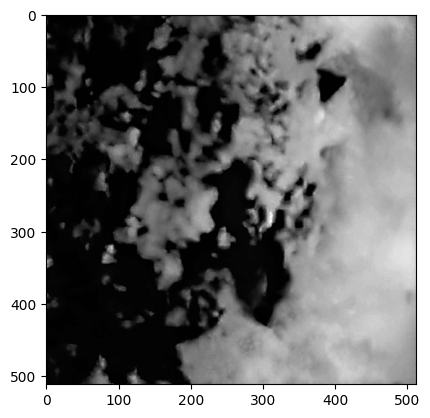

1/1 [==============================] - 0s 15ms/step
No_fire


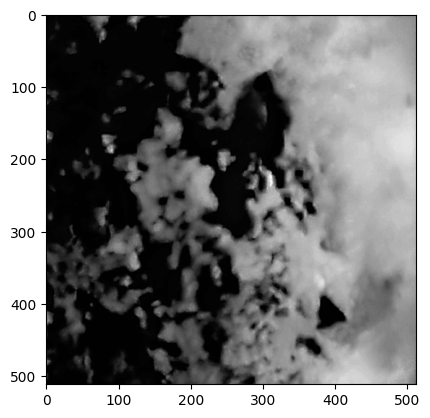

1/1 [==============================] - 0s 21ms/step
No_fire


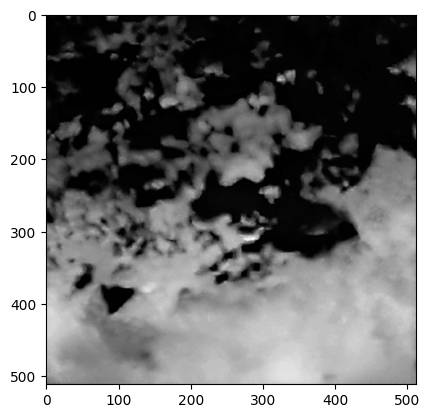

1/1 [==============================] - 0s 21ms/step
No_fire


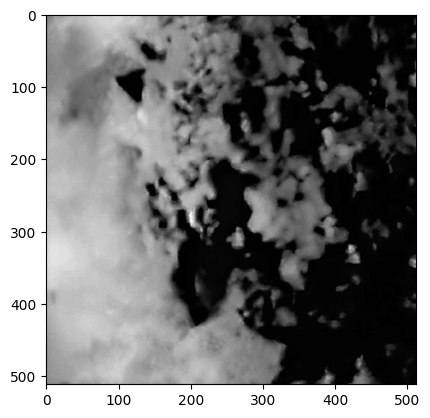

1/1 [==============================] - 0s 23ms/step
No_fire


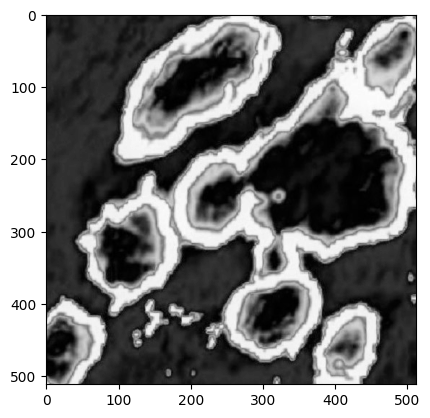

1/1 [==============================] - 0s 21ms/step
Fire


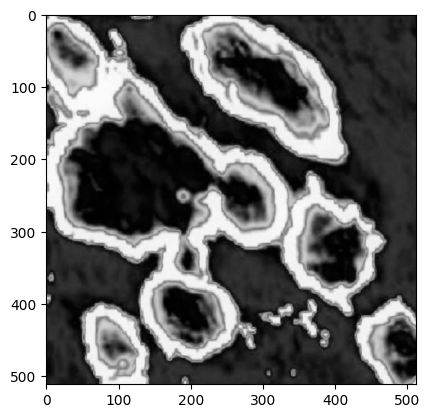

1/1 [==============================] - 0s 21ms/step
Fire


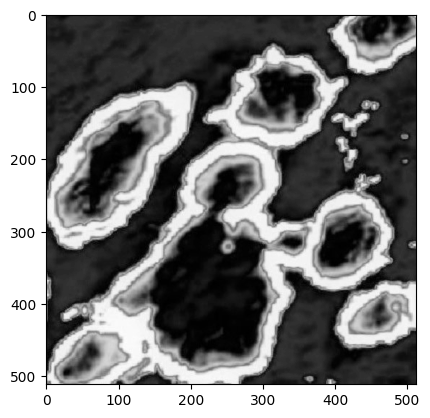

1/1 [==============================] - 0s 24ms/step
Fire


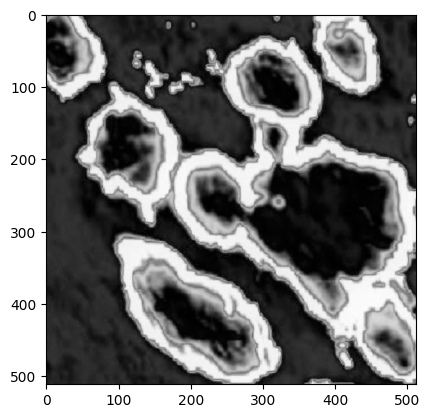

1/1 [==============================] - 0s 19ms/step
Fire


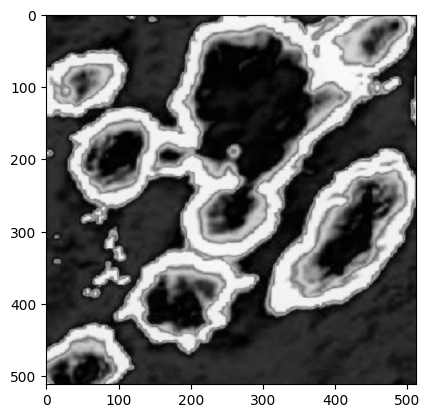

1/1 [==============================] - 0s 20ms/step
Fire


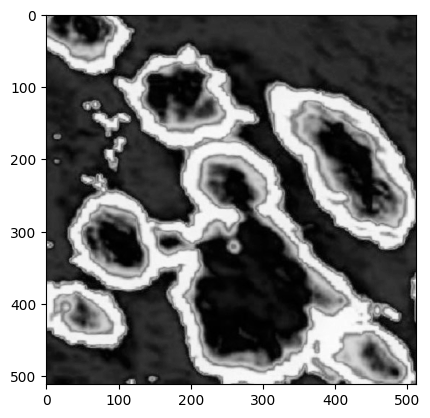

1/1 [==============================] - 0s 20ms/step
Fire


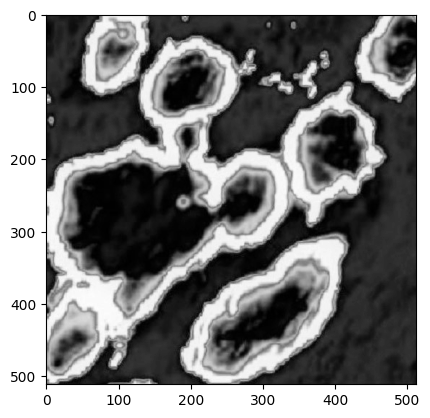

1/1 [==============================] - 0s 19ms/step
Fire


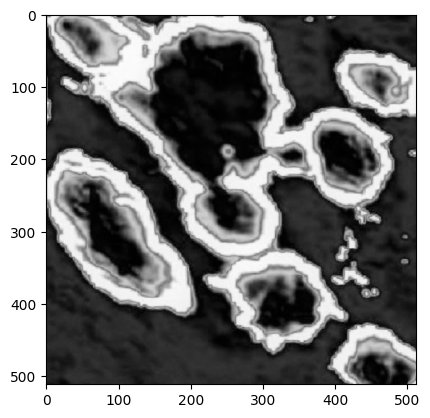

1/1 [==============================] - 0s 24ms/step
Fire


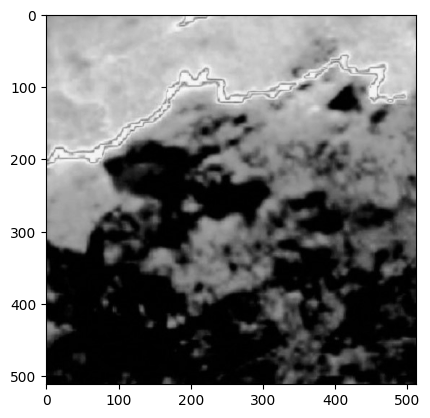

1/1 [==============================] - 0s 21ms/step
No_fire


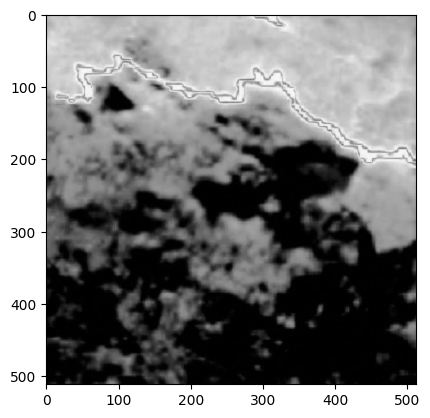

1/1 [==============================] - 0s 27ms/step
No_fire


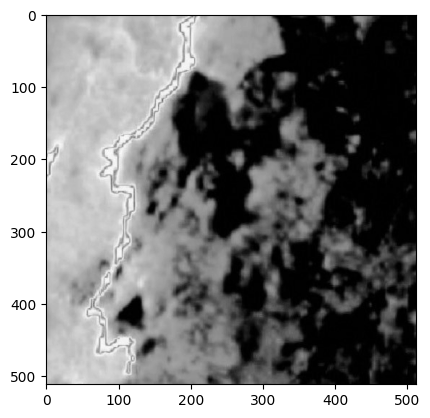

1/1 [==============================] - 0s 19ms/step
No_fire


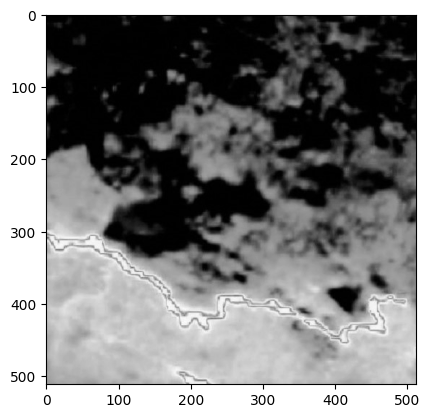

1/1 [==============================] - 0s 37ms/step
No_fire


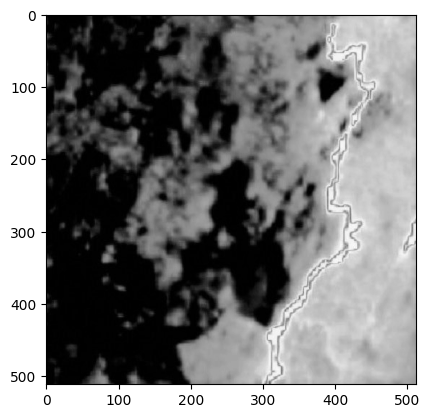

1/1 [==============================] - 0s 31ms/step
No_fire


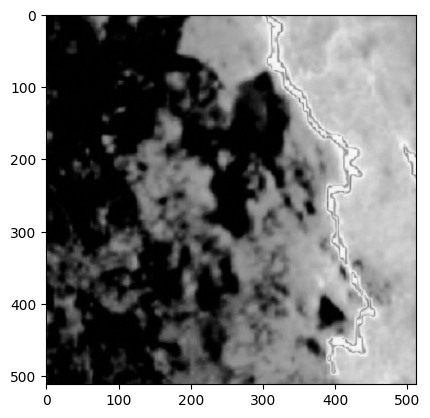

1/1 [==============================] - 0s 25ms/step
No_fire


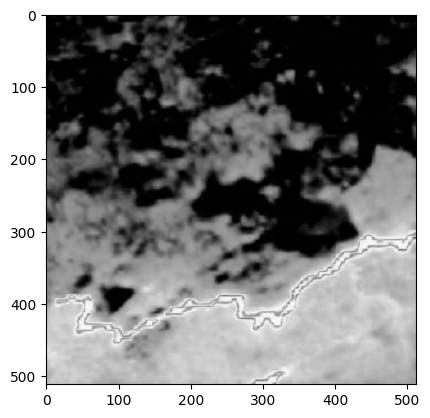

1/1 [==============================] - 0s 24ms/step
No_fire


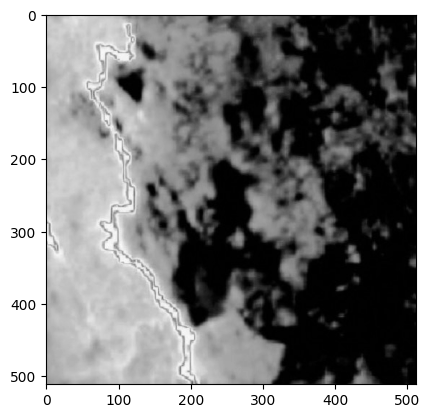

1/1 [==============================] - 0s 24ms/step
No_fire


In [132]:
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    new_array = new_array / 255.0
    return new_array

TESTINGDIR = "drive/MyDrive/Career and Education/SPMU/Scientific work/ВКР бакалавра/Dataset/Testing"

for category in CATEGORIES:
    path = os.path.join(TESTINGDIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        prediction = model.predict([prepare(os.path.join(path, img))])
        print(CATEGORIES[int(prediction[0][0])])